In [131]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import sklearn as sk
from sklearn import preprocessing, model_selection

In [132]:
df_org = pd.read_csv('WISDM_ar_v1.1_raw.csv')

In [133]:
df_group = [group for _, group in df_org.groupby('user_id')]

In [134]:
def plot_activity(data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
    plot_axis(ax0, data['time'], data['acc_x'], 'X-Axis')  # x
    plot_axis(ax1, data['time'], data['acc_y'], 'Y-Axis')  # y
    plot_axis(ax2, data['time'], data['acc_z'], 'Z-Axis')  # z
    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(top=0.90)
    plt.show()


def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title, fontsize=10)
    ax.xaxis.set_visible(False)

    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)


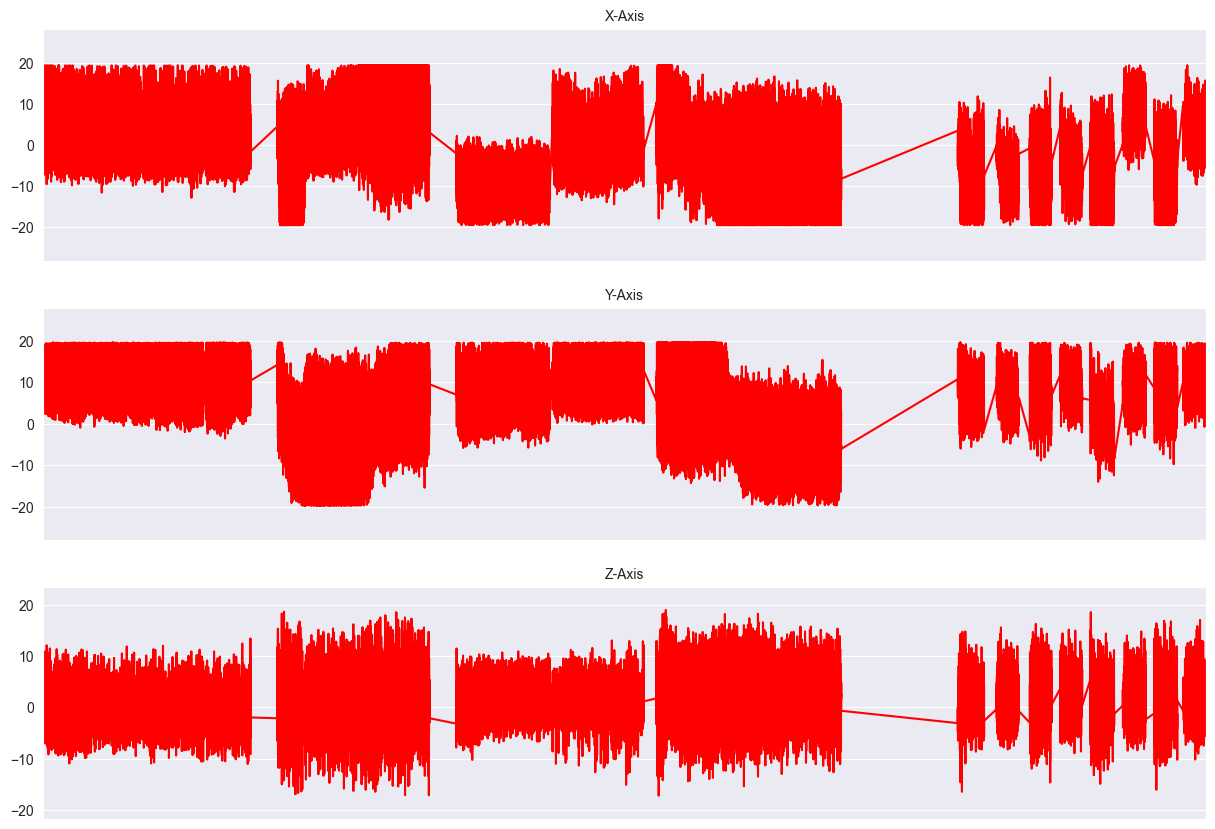

Text(0.5, 0.92, 'Trajectory 2')

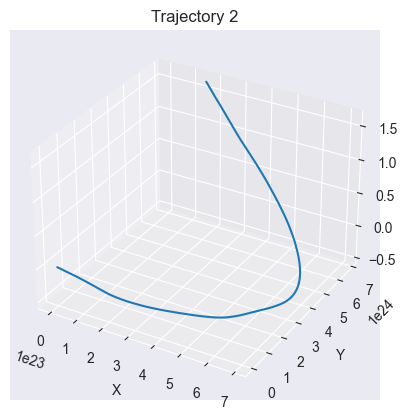

In [135]:
data = df_group[0]

accel_x = data.iloc[:, 3]
accel_y = data.iloc[:, 4]
accel_z = data.iloc[:, 5]

plot_activity(data)

# Time
dt = data.iloc[2, 2] - data.iloc[1, 2]

# Integrate accelerometer data to get velocity
vel_x = np.cumsum(accel_x) * dt
vel_y = np.cumsum(accel_y) * dt
vel_z = np.cumsum(accel_z) * dt

# Integrate velocity to get displacement
disp_x = np.cumsum(vel_x) * dt
disp_y = np.cumsum(vel_y) * dt
disp_z = np.cumsum(vel_z) * dt

fig, axs = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax = axs
# ax.plot3D(position_x, position_y, position_z)
ax.plot3D(disp_x, disp_y, disp_z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trajectory {}'.format(1 + 1))

In [136]:
df = df_org

LABEL = 'ActivityEncoded'

le = preprocessing.LabelEncoder()  # string to Integer
df[LABEL] = le.fit_transform(df['activity'].values.ravel())

df.head()

,user_id,activity,time,acc_x,acc_y,acc_z,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1


In [137]:
df_train, df_val = model_selection.train_test_split(df, train_size=0.8, random_state=42)

In [169]:
# Normalization
scalar = preprocessing.MinMaxScaler()

df_train[['acc_x']] = scalar.fit_transform(np.array(df_train[['acc_x']]))
df_train[['acc_y']] = scalar.fit_transform(np.array(df_train[['acc_y']]))
df_train[['acc_z']] = scalar.fit_transform(np.array(df_train[['acc_z']]))

df_train = df_train.round({'acc_x': 4, 'acc_y': 4, 'acc_z': 4})
df_train.head()


,user_id,activity,time,acc_x,acc_y,acc_z,ActivityEncoded
723470,34,Jogging,927032298000,0.4967,0.6560,0.4111,1
658224,23,Jogging,675182323000,0.3777,0.6424,0.5024,1
132761,13,Upstairs,3386852244000,0.4929,0.7264,0.5169,4
853095,21,Jogging,118371712164000,0.6428,0.8928,0.5004,1
808965,31,Walking,23729931526000,0.5983,0.8847,0.4626,5


In [ ]:
def load_df(file_name):
    data_frame = pd.read_csv(file_name)
    refresh_rate = 100
    arr = np.arange(0, len(data_frame) // refresh_rate + 1, 1 / refresh_rate)
    to_trim = len(data_frame) - len(arr)
    data_frame.insert(0, 'time', arr[:to_trim])
    data_frame.insert(0, 'activity', ['walking'] * (len(data_frame)))
    data_frame.insert(0, 'user_id', np.full(len(data_frame), df_org['user_id'].max()))
    data_frame.drop(data_frame.columns[-3:], axis=1, inplace=True)
    data_frame.rename(columns={'accel_x': 'acc_x'}, inplace=True)
    data_frame.rename(columns={'accel_y': 'acc_y'}, inplace=True)
    data_frame.rename(columns={'accel_z': 'acc_z'}, inplace=True)
    return data_frame

In [ ]:
plot_activity(load_df('experiments/1minwalk/device_red_B1A105.csv'))
plot_activity(load_df('experiments/1minwalk/device_red_B1A104.csv'))
plot_activity(load_df('experiments/1minwalk/device_red_B0A104.csv'))
plot_activity(load_df('experiments/1minwalk/device_red_B0A105.csv'))


In [ ]:
plot_activity(load_df('experiments/letter_W/device_red_B1A105.csv'))
plot_activity(load_df('experiments/letter_W/device_red_B1A104.csv'))
plot_activity(load_df('experiments/letter_W/device_red_B0A104.csv'))
plot_activity(load_df('experiments/letter_W/device_red_B0A105.csv'))

In [255]:
# Define the array of coordinates
coordinates = np.array([(0, 0), (0, 1)])

# Separate the x and y values
x = coordinates[:, 0]
y = coordinates[:, 1]

# Perform linear regression using numpy's polyfit function
coefficients = np.polyfit(x, y, 1)

# Extract the slope and intercept from the coefficients
slope = coefficients[0]
intercept = coefficients[1]

# Print the equation of the linear regression
print(f"The equation of the linear regression is: y = {slope}x + {intercept}")


C:\Users\Admin\Documents\HumanGuestureRecounstruction\venv\lib\site-packages\numpy\lib\polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

In [246]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the coordinates
coordinates = np.array([(0, 0), (1, 0)])

# Separate the x and y values
x = coordinates[:, 0]
y = coordinates[:, 1].reshape(-1, 1)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(y, x)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation of the linear regression
print(f"The equation of the linear regression is: y = {slope}x + {intercept}")
plt.scatter(x, y, color='blue', label='Coordinates')
plt.plot(model.predict(y.reshape(-1, 1)), y, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

0.3071475584169756
The slope of the linear regression is -0.0. The line is not vertical.


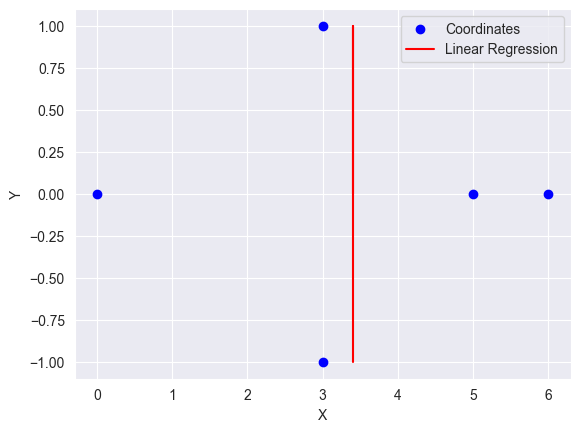

In [268]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# from sklearn.preprocessing import 

# Your coordinates
coordinates = np.array([(0, 0), (5, 0), (6, 0), (3, 1), (3, -1)])
x = coordinates[:, 0]
y = coordinates[:, 1]
stDevX = np.std(x)
stDevY = np.std(y)
print(stDevY / stDevX)

# Fit linear regression
model = LinearRegression()
model.fit(y.reshape(-1, 1), x)

# Get the slope
slope = model.coef_[0]

# Check if the line is vertical (x-coordinates are the same)
if len(np.unique(coordinates[:, 0])) == 1:
    print("The line is vertical.")
else:
    print(f"The slope of the linear regression is {slope}. The line is not vertical.")

plt.scatter(x, y, color='blue', label='Coordinates')
plt.plot(model.predict(y.reshape(-1, 1)), y, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
